In [242]:
import pandas as pd
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
import os
from sklearn.model_selection import train_test_split
import xgboost as xgb
import numpy as np
from sklearn.metrics import mean_squared_error

## Read data

In [40]:
os.getcwd()

'C:\\Users\\Lars\\Documents\\Git\\forecast5.0\\Learning'

In [100]:
#df_1 = pd.read_csv(r'../lenzerheide_zeiraeume_ohne_leere_labels.csv')

In [153]:
lenzerheide_file = tf.keras.utils.get_file('data_lenzerheide.csv', 'https://docs.google.com/spreadsheets/d/1cFjr92P5wtk1wepvWG4DLtw_fvb0WQSUdOXe6HrzmRQ/gviz/tq?tqx=out:csv&sheet=input+dataset_lenzerheide')

In [154]:
df_1 = pd.read_csv(lenzerheide_file)
df_1

,Datum,Wochentag,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,isFeiertag ZH,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,01.01.2016,Freitag,0,NaN,0,NaN,0,NaN,Neujahr,1,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,02.01.2016,Samstag,0,NaN,0,NaN,0,NaN,Berchtoldstag,0,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,03.01.2016,Sonntag,0,NaN,0,NaN,0,NaN,NaN,0,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,04.01.2016,Montag,0,NaN,0,NaN,0,NaN,NaN,0,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,05.01.2016,Dienstag,0,NaN,0,NaN,0,NaN,NaN,0,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1822,27.12.2020,Sonntag,1,NaN,1,NaN,1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1823,28.12.2020,Montag,1,NaN,1,NaN,1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1824,29.12.2020,Dienstag,1,NaN,1,NaN,1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1825,30.12.2020,Mittwoch,1,NaN,1,NaN,1,NaN,NaN,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [155]:
# descriptions
print(df_1.describe())

        isFerienZH   isFerienSG   isFerienGR  isFeiertag ZH  isFeiertag SG  \
count  1827.000000  1827.000000  1827.000000    1827.000000    1827.000000   
mean      0.379858     0.374932     0.393541       0.078818       0.073344   
std       0.485484     0.484238     0.488669       0.269528       0.260772   
min       0.000000     0.000000     0.000000       0.000000       0.000000   
25%       0.000000     0.000000     0.000000       0.000000       0.000000   
50%       0.000000     0.000000     0.000000       0.000000       0.000000   
75%       1.000000     1.000000     1.000000       0.000000       0.000000   
max       1.000000     1.000000     1.000000       1.000000       1.000000   

       isFeiertag GR   t_2m_c_avg  snow_depth_cm_avg  visibility_m_avg  \
count    1827.000000  1393.000000        1393.000000       1393.000000   
mean        0.089765     6.016389          23.745836      25810.177207   
std         0.285923     7.219762          32.987484       4575.828243   
m

In [156]:
df_1.isna().sum()

Datum                                0
Wochentag                            0
isFerienZH                           0
Ferien Desc ZH                    1423
isFerienSG                           0
Ferien Desc SG                    1426
isFerienGR                           0
Ferien Desc GR                    1387
Feiertag Desc                     1628
isFeiertag ZH                        0
isFeiertag SG                        0
isFeiertag GR                        0
t_2m_c_avg                         434
snow_depth_cm_avg                  434
visibility_m_avg                   434
wind_speed_10m_ms_max              434
prob_precip_1h_p_avg               434
prob_tstorm_1h_p_avg               434
hail_idx_avg                       434
wind_gusts_10m_ms_max              434
wind_speed_mean_10m_24h_ms_avg     434
t_max_2m_24h_c_max                 434
t_min_2m_24h_c_min                 434
precip_24h_mm_max                  434
fresh_snow_24h_cm_max              434
is_sleet_1h_idx_max      

In [163]:
df_1 = df_1.loc[df_1['Total Anfragen'].notna()]

In [162]:
df_1 = df_1.loc[df_1['Total Anfragen'] != 0]

In [160]:
df_1.isna().sum()

Datum                               0
Wochentag                           0
isFerienZH                          0
Ferien Desc ZH                    782
isFerienSG                          0
Ferien Desc SG                    787
isFerienGR                          0
Ferien Desc GR                    756
Feiertag Desc                     895
isFeiertag ZH                       0
isFeiertag SG                       0
isFeiertag GR                       0
t_2m_c_avg                          0
snow_depth_cm_avg                   0
visibility_m_avg                    0
wind_speed_10m_ms_max               0
prob_precip_1h_p_avg                0
prob_tstorm_1h_p_avg                0
hail_idx_avg                        0
wind_gusts_10m_ms_max               0
wind_speed_mean_10m_24h_ms_avg      0
t_max_2m_24h_c_max                  0
t_min_2m_24h_c_min                  0
precip_24h_mm_max                   0
fresh_snow_24h_cm_max               0
is_sleet_1h_idx_max                 0
is_fog_1h_id

In [161]:
df_1

,Datum,Wochentag,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,isFeiertag ZH,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,01.01.2016,Freitag,0,NaN,0,NaN,0,NaN,Neujahr,1,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,02.01.2016,Samstag,0,NaN,0,NaN,0,NaN,Berchtoldstag,0,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,03.01.2016,Sonntag,0,NaN,0,NaN,0,NaN,NaN,0,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,04.01.2016,Montag,0,NaN,0,NaN,0,NaN,NaN,0,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,05.01.2016,Dienstag,0,NaN,0,NaN,0,NaN,NaN,0,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,26.09.2019,Donnerstag,0,NaN,0,NaN,0,NaN,NaN,0,...,0.0,0.03,0.0,8.1,0.0,0,15.0,NaN,10.0,25.0
1365,27.09.2019,Freitag,0,NaN,0,NaN,0,NaN,NaN,0,...,0.0,0.00,0.0,6.0,0.7,0,21.0,NaN,10.0,31.0
1366,28.09.2019,Samstag,0,NaN,0,NaN,0,NaN,NaN,0,...,0.0,0.00,0.0,14.2,0.4,0,52.0,NaN,6.0,58.0
1367,29.09.2019,Sonntag,0,NaN,1,Herbstferien,0,NaN,NaN,0,...,0.0,0.00,0.0,9.9,1.4,0,0.0,NaN,7.0,7.0


### Data Cleaning 

In [165]:
df_1['Ferien Desc ZH'].fillna(value=0, inplace = True) # inplace=True overwrite existing value
df_1['Ferien Desc ZH']

0       0
1       0
2       0
3       0
4       0
       ..
1364    0
1365    0
1366    0
1367    0
1368    0
Name: Ferien Desc ZH, Length: 1004, dtype: object

In [166]:
df_1['Ferien Desc GR'].fillna(value=0, inplace = True) # inplace=True overwrite existing value
df_1['Ferien Desc GR']

0       0
1       0
2       0
3       0
4       0
       ..
1364    0
1365    0
1366    0
1367    0
1368    0
Name: Ferien Desc GR, Length: 1004, dtype: object

In [168]:
df_1['Ferien Desc SG'].fillna(value=0, inplace = True) # inplace=True overwrite existing value
df_1['Ferien Desc SG']

0                  0
1                  0
2                  0
3                  0
4                  0
            ...     
1364               0
1365               0
1366               0
1367    Herbstferien
1368    Herbstferien
Name: Ferien Desc SG, Length: 1004, dtype: object

In [169]:
df_1['Feiertag Desc'].fillna(value=0, inplace = True) # inplace=True overwrite existing value
df_1['Feiertag Desc']

0             Neujahr
1       Berchtoldstag
2                   0
3                   0
4                   0
            ...      
1364                0
1365                0
1366                0
1367                0
1368                0
Name: Feiertag Desc, Length: 1004, dtype: object

In [170]:
# input value = 26: Missing values are from September 2019
# values in Sept 2017: 24.2, values in Sept 2018: 27.8
df_1['Tel'].fillna(value=26, inplace = True) # inplace=True overwrite existing value
df_1['Tel']

0       65.0
1       65.0
2       65.0
3       65.0
4       65.0
        ... 
1364    26.0
1365    26.0
1366    26.0
1367    26.0
1368    26.0
Name: Tel, Length: 1004, dtype: float64

In [171]:
df_1

,Datum,Wochentag,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,isFeiertag ZH,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,01.01.2016,Freitag,0,0,0,0,0,0,Neujahr,1,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,02.01.2016,Samstag,0,0,0,0,0,0,Berchtoldstag,0,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,03.01.2016,Sonntag,0,0,0,0,0,0,0,0,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,04.01.2016,Montag,0,0,0,0,0,0,0,0,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,05.01.2016,Dienstag,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,26.09.2019,Donnerstag,0,0,0,0,0,0,0,0,...,0.0,0.03,0.0,8.1,0.0,0,15.0,26.0,10.0,25.0
1365,27.09.2019,Freitag,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,6.0,0.7,0,21.0,26.0,10.0,31.0
1366,28.09.2019,Samstag,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,14.2,0.4,0,52.0,26.0,6.0,58.0
1367,29.09.2019,Sonntag,0,0,1,Herbstferien,0,0,0,0,...,0.0,0.00,0.0,9.9,1.4,0,0.0,26.0,7.0,7.0


In [172]:
# check again for missing values
df_1.isnull().sum()

Datum                             0
Wochentag                         0
isFerienZH                        0
Ferien Desc ZH                    0
isFerienSG                        0
Ferien Desc SG                    0
isFerienGR                        0
Ferien Desc GR                    0
Feiertag Desc                     0
isFeiertag ZH                     0
isFeiertag SG                     0
isFeiertag GR                     0
t_2m_c_avg                        0
snow_depth_cm_avg                 0
visibility_m_avg                  0
wind_speed_10m_ms_max             0
prob_precip_1h_p_avg              0
prob_tstorm_1h_p_avg              0
hail_idx_avg                      0
wind_gusts_10m_ms_max             0
wind_speed_mean_10m_24h_ms_avg    0
t_max_2m_24h_c_max                0
t_min_2m_24h_c_min                0
precip_24h_mm_max                 0
fresh_snow_24h_cm_max             0
is_sleet_1h_idx_max               0
is_fog_1h_idx_max                 0
precip_1h_mm_sum            

## Data Exploration

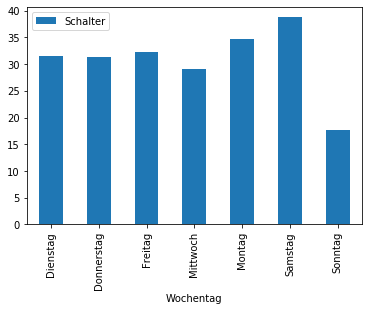

In [174]:
df_1[['Wochentag','Schalter']].groupby('Wochentag').mean().plot(kind='bar')

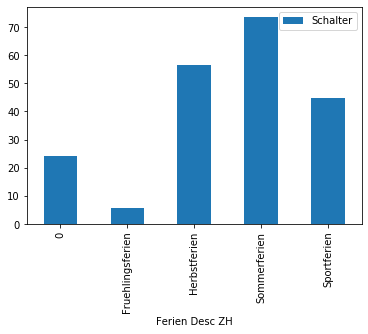

In [188]:
df_1[['Ferien Desc ZH','Schalter']].groupby('Ferien Desc ZH').mean().plot(kind='bar')

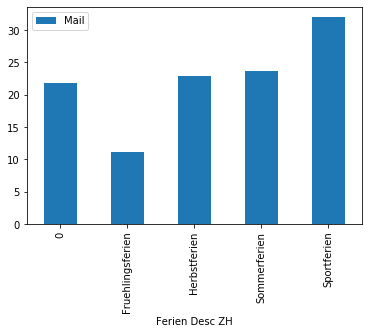

In [190]:
df_1[['Ferien Desc ZH','Mail']].groupby('Ferien Desc ZH').mean().plot(kind='bar')

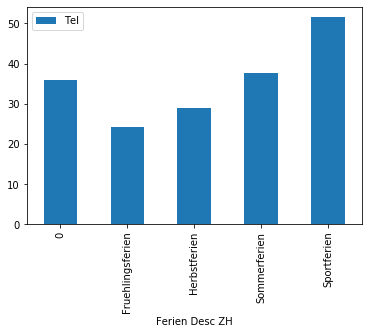

In [192]:
df_1[['Ferien Desc ZH','Tel']].groupby('Ferien Desc ZH').mean().plot(kind='bar')

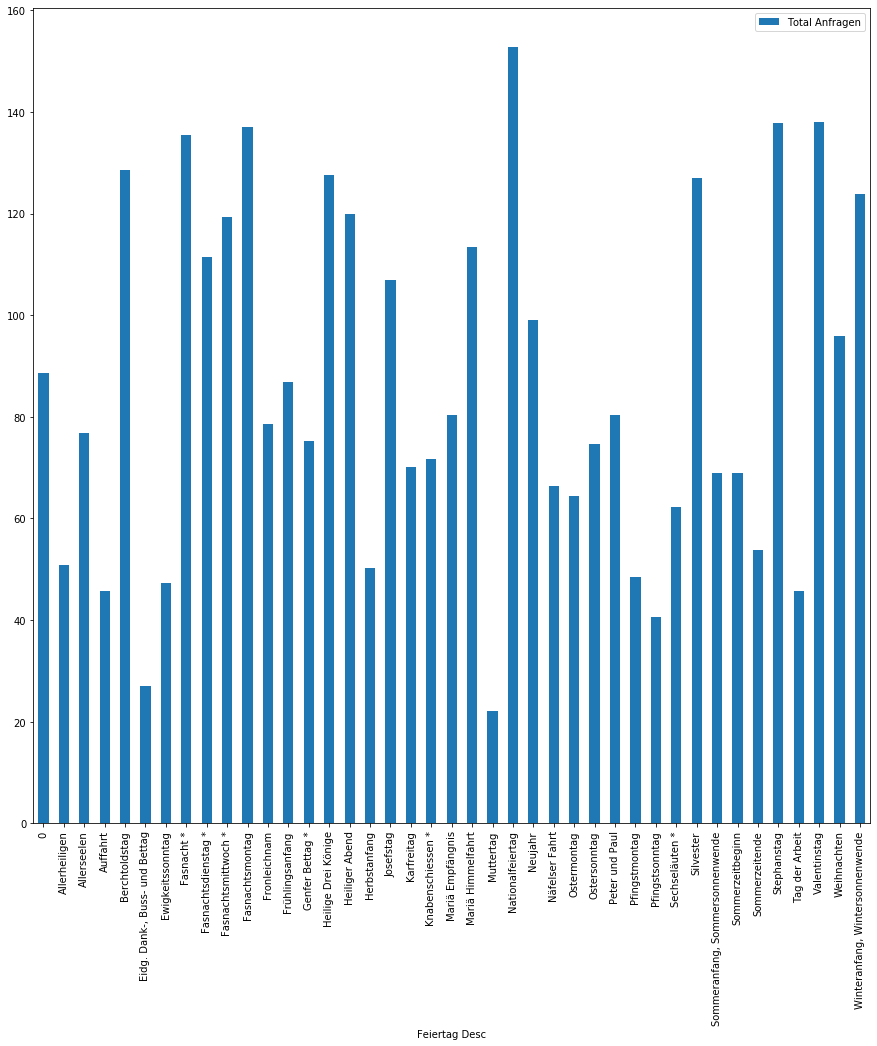

In [200]:
width = 15
height = 15
df_1[['Feiertag Desc','Total Anfragen']].groupby('Feiertag Desc').mean().plot(kind='bar',figsize=(width, height))


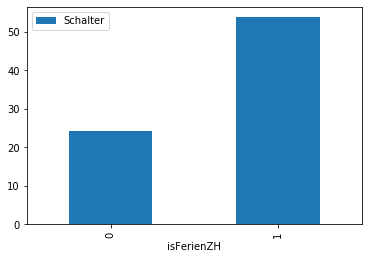

In [191]:
df_1[['isFerienZH','Schalter']].groupby('isFerienZH').mean().plot(kind='bar')

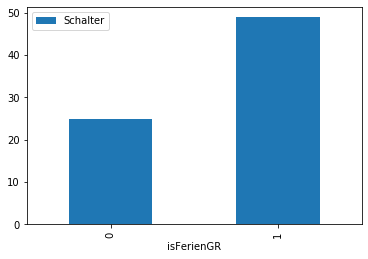

In [180]:
df_1[['isFerienGR','Schalter']].groupby('isFerienGR').mean().plot(kind='bar')

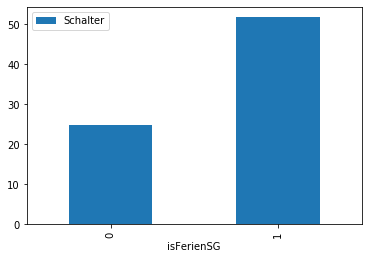

In [181]:
df_1[['isFerienSG','Schalter']].groupby('isFerienSG').mean().plot(kind='bar')

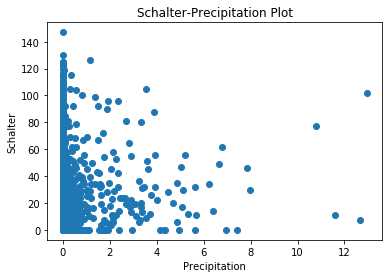

In [183]:
plt.xlabel('Precipitation')
plt.ylabel('Schalter')
plt.title('Schalter-Precipitation Plot')
plt.scatter(df_1['precip_1h_mm_sum'], df_1['Schalter'])

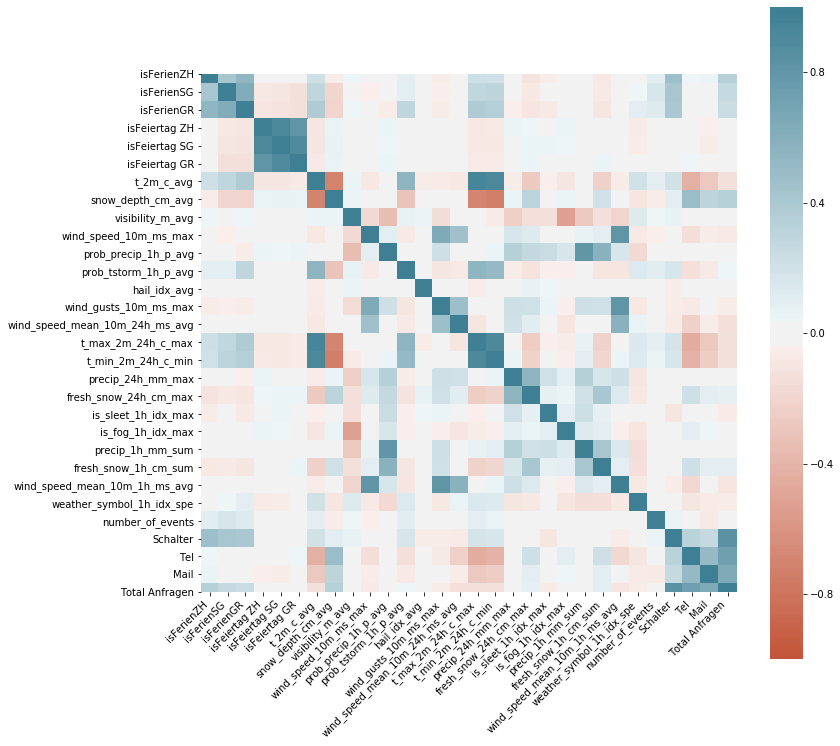

In [185]:
width = 12
height = 12
plt.figure(figsize=(width, height))
corr = df_1.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Save cleaned data

In [329]:
df_1.to_csv("../data/data_lenzerheide_clean.csv", sep = ",", index=False)

In [330]:
d = pd.read_csv("../data/data_lenzerheide_clean.csv",)


In [332]:
d_all = d
d = d.drop('Datum', axis=1)
d

,Wochentag,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,isFeiertag ZH,isFeiertag SG,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,Freitag,0,0,0,0,0,0,Neujahr,1,1,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,Samstag,0,0,0,0,0,0,Berchtoldstag,0,0,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,Sonntag,0,0,0,0,0,0,0,0,0,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,Montag,0,0,0,0,0,0,0,0,0,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,Dienstag,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,Donnerstag,0,0,0,0,0,0,0,0,0,...,0.0,0.03,0.0,8.1,0.0,0,15.0,26.0,10.0,25.0
1000,Freitag,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,6.0,0.7,0,21.0,26.0,10.0,31.0
1001,Samstag,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,14.2,0.4,0,52.0,26.0,6.0,58.0
1002,Sonntag,0,0,1,Herbstferien,0,0,0,0,0,...,0.0,0.00,0.0,9.9,1.4,0,0.0,26.0,7.0,7.0


## XGBoost Model: 1st Attempt 

In [333]:
# Encoding categorical columns I: LabelEncoder 
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Create a boolean mask for categorical columns 
categorical_mask = (d.dtypes == object)  # true → is categorical
# Get list of categorical column names
categorical_columns = d.columns[categorical_mask].tolist()
# Print the head of the categorical columns 
print(d[categorical_columns].head())
# Create LabelEncoder object: le 
le = LabelEncoder()
# Apply LabelEncoder to categorical columns
d[categorical_columns] = d[categorical_columns].apply(lambda x: le.fit_transform(x))
# Print the head of the LabelEncoded categorical columns print(df[categorical_columns].head())


  Wochentag Ferien Desc ZH Ferien Desc SG Ferien Desc GR  Feiertag Desc
0   Freitag              0              0              0        Neujahr
1   Samstag              0              0              0  Berchtoldstag
2   Sonntag              0              0              0              0
3    Montag              0              0              0              0
4  Dienstag              0              0              0              0


In [334]:
d

,Wochentag,isFerienZH,Ferien Desc ZH,isFerienSG,Ferien Desc SG,isFerienGR,Ferien Desc GR,Feiertag Desc,isFeiertag ZH,isFeiertag SG,...,is_fog_1h_idx_max,precip_1h_mm_sum,fresh_snow_1h_cm_sum,wind_speed_mean_10m_1h_ms_avg,weather_symbol_1h_idx_spe,number_of_events,Schalter,Tel,Mail,Total Anfragen
0,2,0,0,0,0,0,0,24,1,1,...,0.0,0.00,0.0,3.8,1.7,0,23.0,65.0,10.0,98.0
1,5,0,0,0,0,0,0,4,0,0,...,1.0,1.70,2.1,3.6,0.0,0,72.0,65.0,18.0,155.0
2,6,0,0,0,0,0,0,0,0,0,...,1.0,0.57,0.5,4.2,0.0,0,38.0,65.0,25.0,128.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.08,0.0,8.9,0.0,0,65.0,65.0,50.0,180.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,5.9,1.1,0,31.0,65.0,40.0,136.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999,1,0,0,0,0,0,0,0,0,0,...,0.0,0.03,0.0,8.1,0.0,0,15.0,26.0,10.0,25.0
1000,2,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,6.0,0.7,0,21.0,26.0,10.0,31.0
1001,5,0,0,0,0,0,0,0,0,0,...,0.0,0.00,0.0,14.2,0.4,0,52.0,26.0,6.0,58.0
1002,6,0,0,1,2,0,0,0,0,0,...,0.0,0.00,0.0,9.9,1.4,0,0.0,26.0,7.0,7.0


In [335]:
# One Hot Encoding
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
# Create OneHotEncoder: ohe
ohe = OneHotEncoder(categorical_features=categorical_mask, sparse=False)
# Apply OneHotEncoder to categorical columns - output is no longer a dataframe: df_encoded df_encoded = ohe.fit_transform(df)
# Print first 5 rows of the resulting dataset - again, this will no longer be a pandas dataframe print(df_encoded[:5, :])
# Print the shape of the original DataFrame 
d_encoded = ohe.fit_transform(d)
print(d.shape)
# Print the shape of the transformed array 
print(d_encoded.shape)
print(type(d_encoded))
d_encoded

(1004, 35)
(1004, 93)
<class 'numpy.ndarray'>


C:\home\lars\.conda\envs\Hackday_Lenzerheide\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\home\lars\.conda\envs\Hackday_Lenzerheide\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[  0.,   0.,   1., ...,  65.,  10.,  98.],
       [  0.,   0.,   0., ...,  65.,  18., 155.],
       [  0.,   0.,   0., ...,  65.,  25., 128.],
       ...,
       [  0.,   0.,   0., ...,  26.,   6.,  58.],
       [  0.,   0.,   0., ...,  26.,   7.,   7.],
       [  0.,   0.,   0., ...,  26.,  21.,  63.]])

In [336]:
#d_test = d_encoded[-61:]
#d_train_validation = d_encoded[:-61]
#print(d_train_validation.shape)
#print(d_test.shape)
#type(d_train_validation)

In [339]:
X, y = d_encoded[:,:-4],d_encoded[:,-4]
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, 
                                                        random_state=122, shuffle=False)
DM_train = xgb.DMatrix(data=X_train,label=y_train)
DM_test =  xgb.DMatrix(data=X_test,label=y_test)
params = {"booster":"gblinear","objective":"reg:linear"}
xg_reg = xgb.train(params = params, dtrain=DM_train, num_boost_round=10)

preds = xg_reg.predict(DM_test)

rmse = np.sqrt(mean_squared_error(y_test,preds))

print("RMSE: %f" % (rmse))

[22:11:20] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 14.862253


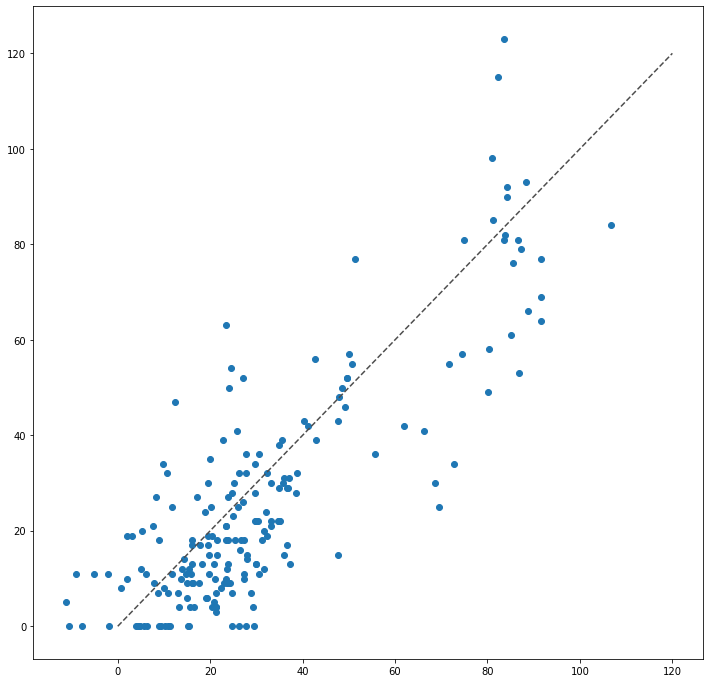

In [360]:
width = 12
height = 12
plt.figure(figsize=(width, height))
plt.plot([0, 120], [0, 120], ls="--", c=".3")
plt.scatter(preds,y_test)


Text(0.5, 1.0, 'Schalter Besucher:Prediction vs. Test Value')

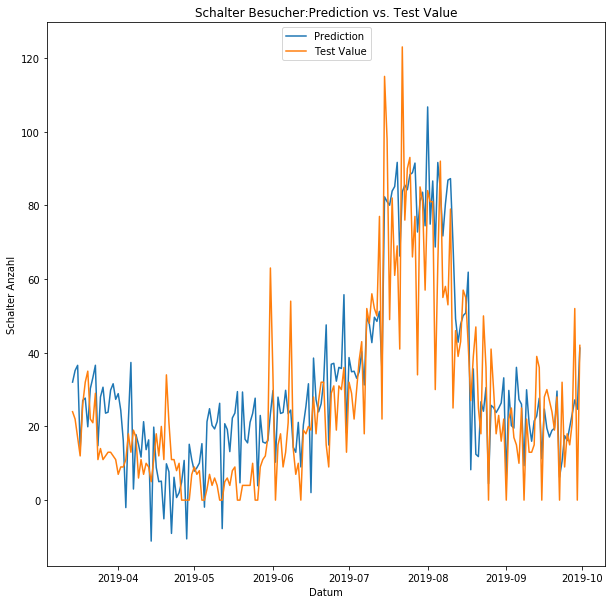

In [375]:
width = 10
height = 10
plt.figure(figsize=(width, height))
t = pd.date_range(start='2019-03-14',end='2019-09-30')

plt.plot(t, preds)
plt.plot(t, y_test)

plt.xlabel('Datum')
plt.ylabel('Schalter Anzahl')
plt.legend(('Prediction', 'Test Value'), loc='upper center')
plt.title('Schalter Besucher:Prediction vs. Test Value')


Text(0.5, 1.0, 'Schalter Besucher: Difference Prediction vs. Test Value')

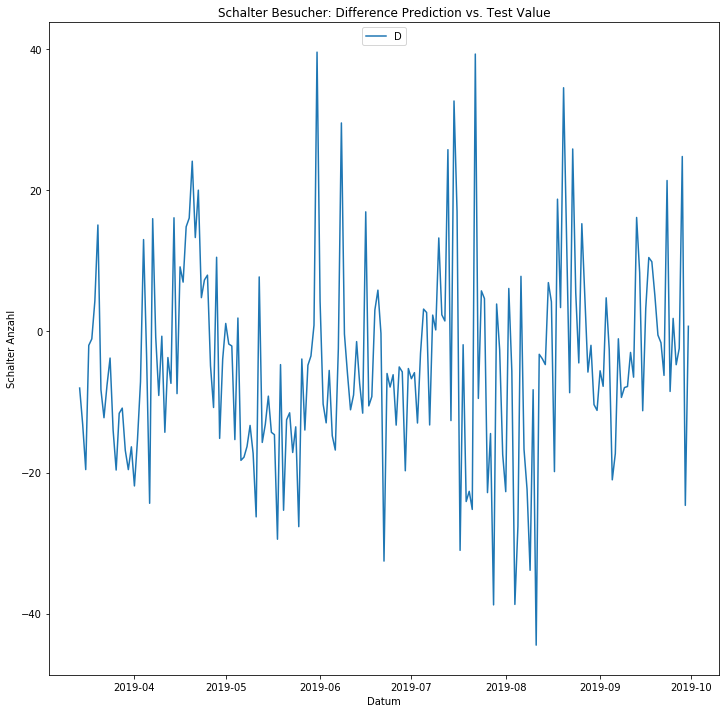

In [373]:
dif = y_test-preds

width = 12
height = 12
plt.figure(figsize=(width, height))
t = pd.date_range(start='2019-03-14',end='2019-09-30')

plt.plot(t, dif)

plt.xlabel('Datum')
plt.ylabel('Schalter Anzahl')
plt.legend('Difference', loc='upper center')
plt.title('Schalter Besucher: Difference Prediction vs. Test Value')


## XGBoost Model: 2nd Attempt

In [392]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV

xgb_pipeline = Pipeline([("st_scaler",StandardScaler()), 
                        ("xgb_model",xgb.XGBRegressor(max_depth=3))])

gbm_param_grid = {'xgb_model__subsample': np.arange(.05, 1, .05),
                  'xgb_model__max_depth': np.arange(3,20,1),
                  'xgb_model__colsample_bytree': np.arange(.1,1.05,.05) }

randomized_neg_mse = RandomizedSearchCV(estimator=xgb_pipeline, 
                                        param_distributions=gbm_param_grid, n_iter=10,
                                        scoring='neg_mean_squared_error', cv=4)
randomized_neg_mse.fit(X_train, y_train)
print("Best rmse: ", np.sqrt(np.abs(randomized_neg_mse.best_score_)))
print("Best model: ", randomized_neg_mse.best_estimator_)

[23:46:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:54] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:55] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[23:46:57] WARNI

C:\home\lars\.conda\envs\Hackday_Lenzerheide\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


[23:47:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Best rmse:  19.127495171240763
Best model:  Pipeline(memory=None,
         steps=[('st_scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('xgb_model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsample_bytree=0.15000000000000002, gamma=0,
                              importance_type='gain', learning_rate=0.1,
                              max_delta_step=0, max_depth=12,
                              min_child_weight=1, missing=None,
                              n_estimators=100, n_jobs=1, nthread=None,
                              objective='reg:linear', random_state=0,
                              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
    

In [393]:
preds_2 = randomized_neg_mse.predict(X_test)

rmse_2 = np.sqrt(mean_squared_error(y_test,preds_2))

print("RMSE: %f" % (rmse_2))

RMSE: 14.822432


In [391]:
print(type(X))
print(type(y))
print(type(DM_train))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'xgboost.core.DMatrix'>


In [ ]:

# Create the parameter grid
gbm_param_grid = {
    'clf__learning_rate': np.arange(0.05, 1, 0.05), 
    'clf__max_depth': np.arange(3, 10, 1), 
    'clf__n_estimators': np.arange(50, 200, 50)